# Feature Selection

In [1]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [2]:
hotel_rev = pd.read_csv('HotelRevHelpfulness.csv')
print(hotel_rev.shape)
hotel_rev.head()

(486, 25)


,hotelId,aveHelpfulnessRatioUser,stdevHelpfulnessRatioUser,pcReviewsExceedMinHelpfulnessSupport,numReviewsUser,numReviewsHotel,ratingUser,numberSubRatingsUser,subRatingMeanUser,subRatingStdevUser,...,completeness_2,completeness_3,numberTermsEntry,percentageAlphaCharsEntry,fractionUpperCaseCharsEntry,fractionYouVsIEntry,numberTermsSummaryQuote,percentageAlphaCharsSummaryQuote,fractionUpperCaseCharsSummaryQuote,reviewHelpfulness
0,17420,1.000000,0.000000,0.666667,3,16,5,4,4.000000,0.000000,...,0,1,182,0.788474,0.025703,0.500000,6,0.815789,0.096774,1
1,1397,0.772487,0.377321,0.500000,12,233,5,0,0.000000,0.000000,...,0,0,158,0.791888,0.012594,0.500000,1,1.000000,0.083333,1
2,1348,0.715473,0.300437,0.833333,12,302,4,7,3.714286,0.755929,...,0,3,59,0.799639,0.024831,0.333333,4,0.828571,0.034483,0
3,5940,0.521250,0.481675,0.222222,36,6,1,4,1.000000,0.000000,...,0,0,95,0.782212,0.029155,0.500000,2,0.800000,0.062500,0
4,38,0.603175,0.246926,1.000000,2,271,3,0,0.000000,0.000000,...,0,0,43,0.805128,0.028662,0.000000,1,1.000000,0.142857,0


In [3]:
y = hotel_rev.pop('reviewHelpfulness').values
hotel_rev.pop('hotelId')
X = hotel_rev.values
hotel_rev.shape

(486, 23)

## Filter-based Feature Selection
### Feature Scoring - two methods  
1. Chi square statistic
2. Information Gain

In [4]:
chi2_score, pval = chi2(X, y)
chi2_score
# The chi square scores for the 23 features

array([1.17643855e+00, 1.25630861e+00, 2.97935332e+00, 4.99241616e+02,
       2.09687468e+01, 4.63515335e+00, 1.60567118e+01, 2.34205853e+01,
       1.22221503e-01, 2.01609093e-01, 5.11397162e-01, 4.38593706e-02,
       4.29417810e-02, 1.10399662e+01, 7.01736499e+00, 1.50630136e+01,
       1.35095136e+03, 4.73150717e-03, 3.15477433e-03, 1.96131502e+00,
       2.26290946e-01, 5.28034618e-03, 9.95572153e-03])

In [5]:
i_scores = mutual_info_classif(X,y)
i_scores
# The i-gain scores for the 23 features

array([0.02525321, 0.03117157, 0.0082338 , 0.07983271, 0.05474908,
       0.00563988, 0.        , 0.017861  , 0.01075888, 0.04606872,
       0.10510759, 0.04366543, 0.05665397, 0.02486236, 0.0129518 ,
       0.0238643 , 0.05278324, 0.        , 0.        , 0.04507296,
       0.        , 0.        , 0.0078382 ])

In [6]:
from scipy import stats
stats.spearmanr(chi2_score, i_scores)

SignificanceResult(statistic=0.35948804606904805, pvalue=0.0920349599872929)

In [7]:
mi = dict()

for i,j in zip(hotel_rev.columns,i_scores):
    mi[i]=j
    print(i,": ",j)

aveHelpfulnessRatioUser :  0.025253211009065968
stdevHelpfulnessRatioUser :  0.03117156847945579
pcReviewsExceedMinHelpfulnessSupport :  0.008233795671241273
numReviewsUser :  0.07983271171151074
numReviewsHotel :  0.05474908400636158
ratingUser :  0.005639882725573919
numberSubRatingsUser :  0.0
subRatingMeanUser :  0.017861001536223053
subRatingStdevUser :  0.010758878256107218
aveRatingUser :  0.04606871768636567
stdevRatingUser :  0.10510759481976484
aveRatingHotel :  0.043665429801211575
stdevRatingHotel :  0.05665397190327459
completeness_1 :  0.024862359634461484
completeness_2 :  0.012951795572705649
completeness_3 :  0.023864295179893746
numberTermsEntry :  0.05278324171830118
percentageAlphaCharsEntry :  0.0
fractionUpperCaseCharsEntry :  0.0
fractionYouVsIEntry :  0.04507296041902875
numberTermsSummaryQuote :  0.0
percentageAlphaCharsSummaryQuote :  0.0
fractionUpperCaseCharsSummaryQuote :  0.007838196736115632


#### Image Segmentation Data

In [8]:
import pandas as pd
seg_data = pd.read_csv('segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [9]:
seg_data['Class'].describe()

count          2310
unique            7
top       BRICKFACE
freq            330
Name: Class, dtype: object

In [10]:
y = seg_data.pop('Class').values
X = seg_data.values

### Feature Selection

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [12]:
mi = dict()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=1/2)
i_scores = mutual_info_classif(X_train, y_train)

for i,j in zip(seg_data.columns,i_scores):
    mi[i]=j
 
df = pd.DataFrame.from_dict(mi,orient='index',columns=['I-Gain'])
df.sort_values(by=['I-Gain'],ascending=False,inplace=True)
df.head(-5)

,I-Gain
RAWRED-MEAN,1.258258
INTENSITY-MEAN,1.156082
HUE-MEAN,1.152714
RAWGREEN-MEAN,1.128984
VALUE-MEAN,1.106756
RAWBLUE-MEAN,1.106387
REGION-CENTROID-ROW,0.962245
SATURATION-MEAN,0.951633
EXBLUE-MEAN,0.949954
EXGREEN-MEAN,0.938329


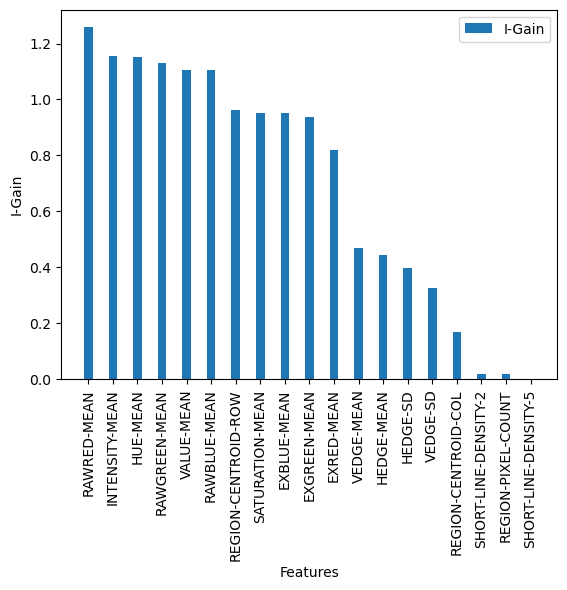

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

n = len(df.index)
rr = range(1,n)
fig, ax = plt.subplots()
ax.bar(df.index, df["I-Gain"], label='I-Gain',width=.35)
ax.set_xticks(list(df.index))
ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax.legend()

plt.show()

## Select *k* Best Features
We rank the features using information gain (well mutual information) and select the _k_ best to build a classifier.  
We iterate through increasing values of *k*.  
`SelectKBest` is a _transform_ that transforms the training data.


In [14]:
acc_scores = []
for kk in range(1, X.shape[1]+1):
    FS_trans = SelectKBest(mutual_info_classif, 
                           k=kk).fit(X_train, y_train)
    X_tR_new = FS_trans.transform(X_train)
    X_tS_new = FS_trans.transform(X_test)
    seg_NB = gnb.fit(X_tR_new, y_train)
    y_dash = seg_NB.predict(X_tS_new)
    acc = accuracy_score(y_test, y_dash)
    acc_scores.append(acc)

df['Accuracy'] = acc_scores
df.head(10)

,I-Gain,Accuracy
RAWRED-MEAN,1.258258,0.553247
INTENSITY-MEAN,1.156082,0.546320
HUE-MEAN,1.152714,0.678788
RAWGREEN-MEAN,1.128984,0.696970
VALUE-MEAN,1.106756,0.679654
RAWBLUE-MEAN,1.106387,0.670996
REGION-CENTROID-ROW,0.962245,0.779221
SATURATION-MEAN,0.951633,0.797403
EXBLUE-MEAN,0.949954,0.783550
EXGREEN-MEAN,0.938329,0.786147


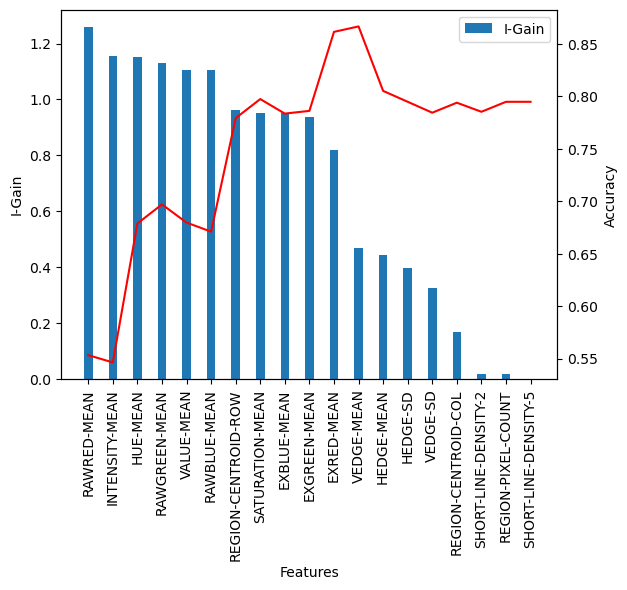

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

n = len(df.index)
rr = range(1,n)
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["I-Gain"], label='I-Gain',width=.35)
ax2.plot(df.index, df["Accuracy"], color='red', label='Accuracy')
ax.set_xticks(list(df.index))
ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Accuracy')
ax.legend()

plt.show()

---
## Permutation Feature Importance
https://scikit-learn.org/stable/modules/permutation_importance.html  

This is a good way to score feature importance in the context of a specific classifier/model.  
The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled.  
The idea comes from the original work on Random Forests by Leo Breiman:  
L. Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.

In [16]:
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [17]:
seg_scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = seg_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=2, test_size=1/2)

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_perm = permutation_importance(knn, X_train, y_train, 
                                n_repeats=10, random_state=0)

In [19]:
knn_perm.importances_mean

array([ 7.34199134e-02,  1.81125541e-01,  0.00000000e+00,  8.48484848e-03,
        5.97402597e-03,  1.02164502e-02, -1.73160173e-04,  5.19480519e-03,
       -7.79220779e-04,  1.29004329e-02,  1.18614719e-02,  1.98268398e-02,
        1.06493506e-02,  6.45887446e-02,  1.52380952e-02,  2.17316017e-02,
        2.00000000e-02,  1.34372294e-01,  1.64415584e-01])

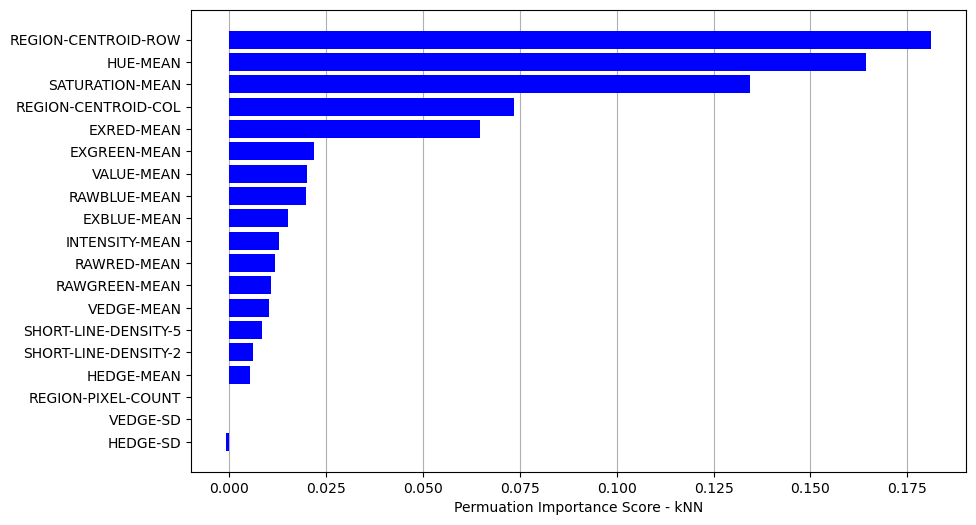

In [20]:
sorted_idx = knn_perm.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(seg_data.columns[sorted_idx], knn_perm.importances[sorted_idx].mean(axis=1).T, 
        color="blue", zorder=3)
ax.xaxis.grid(True)
ax.set_xlabel("Permuation Importance Score - kNN");


In [21]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_perm = permutation_importance(gnb, X_train, y_train, 
                                n_repeats=10, random_state=0)

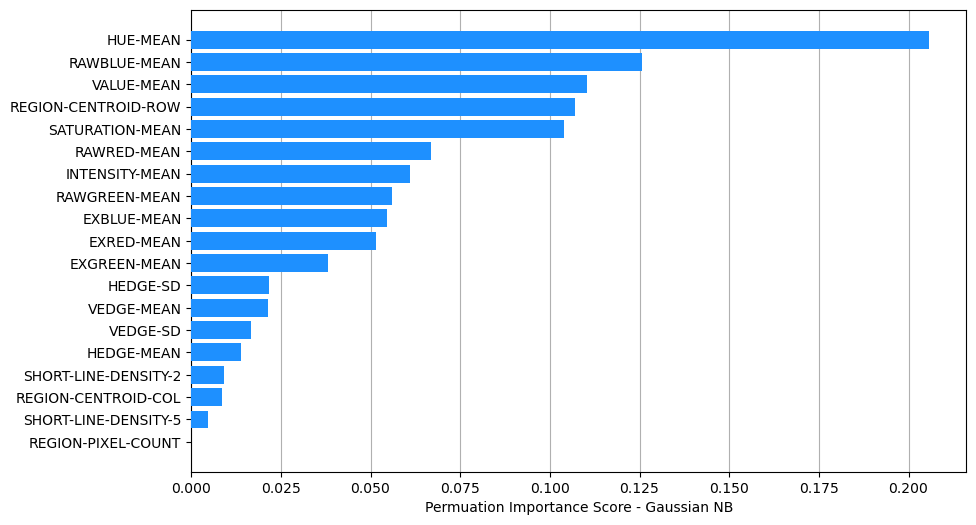

In [22]:
sorted_idx = gnb_perm.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(seg_data.columns[sorted_idx], gnb_perm.importances[sorted_idx].mean(axis=1).T, 
        color="dodgerblue", zorder=3)
ax.xaxis.grid(True)
ax.set_xlabel("Permuation Importance Score - Gaussian NB");

---
## Wrapper
Forward Sequential Search on Image Segmentation data.  
`scikit learn` does not support Wrapper feature selection so we use `MLxtend`.  
http://rasbt.github.io/mlxtend/
So you will probably need to install some libraries:  
`pip install mlxtend`  
`pip install joblib`

In [23]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

knn = KNeighborsClassifier(n_neighbors=4)

seg_data = pd.read_csv('segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [24]:
y = seg_data.pop('Class').values
X = seg_data.values
seg_scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = seg_scaler.transform(X)

feature_names = seg_data.columns

Run forward sequential wrapper search to select 7 features using 10-fold xval.  

In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X_scaled, y)
#sfs1 = sfs1.fit(X, y, custom_feature_names=feature_names)


[2024-10-19 00:34:14] Features: 1/3 -- score: 0.7437229437229437
[2024-10-19 00:34:14] Features: 2/3 -- score: 0.9086580086580086
[2024-10-19 00:34:14] Features: 3/3 -- score: 0.9606060606060606

In [26]:
inds = sfs1.k_feature_names_
[feature_names[int(x)] for x in inds]

['REGION-CENTROID-ROW', 'SATURATION-MEAN', 'HUE-MEAN']

In [27]:
f_range = (2, seg_data.shape[1])
sfs_forward = SFS(knn, 
                  k_features=7, 
                  forward=True, 
                  floating=False, 
                  verbose=1,
                  scoring='accuracy',
                  cv=10, n_jobs = -1)

sfs_forward = sfs_forward.fit(X_scaled, y)
         #                     custom_feature_names=feature_names)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.9s finished
Features: 1/7[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  18 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished
Features: 2/7[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.1s finished
Features: 3/7[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished
Features: 4/7[Parallel(n_jobs=-1)]: Using bac

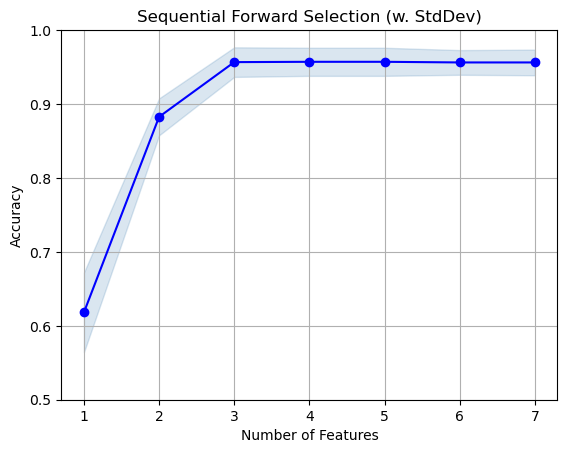

['REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'VEDGE-SD', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'HUE-MEAN']


In [28]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_forward.get_metric_dict(), 
                ylabel='Accuracy',
                kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
sel_feat_names = [feature_names[int(x)] for x in sfs_forward.k_feature_names_]
print(sel_feat_names)